In [ ]:
X_train = pd.DataFrame()

# Running-ml-project

##### Project of predicting bunred calories during running activity. Data belongs only to one man 

In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime

# Load data

In [2]:
# Extract project df
PROJECT_URL = 'https://raw.githubusercontent.com/AdrianSzymczyk/AdrianSzymczyk/main/datasets/activity_log.csv'
df = pd.read_csv(PROJECT_URL)
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18,01:27.1,6


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      689 non-null    object 
 1   Date               689 non-null    object 
 2   Title              689 non-null    object 
 3   Distance           689 non-null    float64
 4   Calories           689 non-null    object 
 5   Time               689 non-null    object 
 6   Avg HR             689 non-null    object 
 7   Max HR             689 non-null    object 
 8   Avg Run Cadence    689 non-null    object 
 9   Max Run Cadence    689 non-null    object 
 10  Avg Pace           689 non-null    object 
 11  Best Pace          689 non-null    object 
 12  Elev Gain          689 non-null    object 
 13  Elev Loss          689 non-null    object 
 14  Avg Stride Length  689 non-null    float64
 15  Best Lap Time      689 non-null    object 
 16  Number of Laps     689 non

# Preprocessing

### Delete rows with missing values 

In [38]:
df = df[~df[['Distance', 'Avg HR', 'Max HR', 'Avg Pace', 'Avg Run Cadence', 'Elev Gain', 'Elev Loss']].isin(['--']).any(axis=1)].reset_index(drop=True)

## Convert Avg HR Max HR columns into numeric type

In [39]:
df['Elev Gain'] = df['Elev Gain'].apply(lambda x: int(str(x).replace(',', '')))
df['Elev Loss'] = df['Elev Loss'].apply(lambda x: int(str(x).replace(',', '')))
df['Calories'] = df['Calories'].apply(lambda x: int(str(x).replace(',', '')))

In [40]:
df['Calories'] = df['Calories'].astype(int)
df['Avg HR'] = df['Avg HR'].astype(int)
df['Max HR'] = df['Max HR'].astype(int)
df['Avg Run Cadence'] = df['Avg Run Cadence'].astype(int)
df['Max Run Cadence'] = df['Max Run Cadence'].astype(int)
df['Elev Gain'] = df['Elev Gain'].astype(float)
df['Elev Loss'] = df['Elev Loss'].astype(float)

### Fix problem with Time shorter than 10 minutes

#### Convert column Time values with format %M:%S.%MS to format %H:%M:%S

In [41]:
invalid_time_indices = df[df['Time'].apply(lambda x: x[-2] == '.')].index

In [42]:
df['Time'] = df['Time'].apply(lambda x: datetime.strptime(x, '%M:%S.%f').time() if x[-2] == '.' else datetime.strptime(x, '%H:%M:%S').time())

### Convert Time into numeric representation as total number of seconds

In [43]:
df['Time'] = pd.to_timedelta(df['Time'].astype(str)).dt.total_seconds().astype(int)

#### Pace conversion 

In [44]:
def pace_to_km(pace):
    mile = 1.60934 
    minutes, seconds = pace.split(':')
    pace_in_seconds = int(minutes) * 60 + int(seconds)
    pace_per_km = round(pace_in_seconds / mile)
    return pace_per_km

#### Avg Pace conversion

In [45]:
df['Avg Pace'] = df['Avg Pace'].apply(pace_to_km)

#### Best Pace conversion

In [46]:
df['Best Pace'] = df['Best Pace'].apply(pace_to_km)

### Convert data units from Miles to Kilometers

#### Distance conversion

In [47]:
df['Distance'] = df['Distance'].apply(lambda x: round(x * 1.60934, 2))

# 📈 Discover and visualize the data insights

In [48]:
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,9.66,530,2635,141,160,176,182,273,236,169.0,173.0,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,10.46,587,2824,144,160,172,182,270,245,183.0,187.0,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,8.06,392,2429,128,151,170,180,301,217,124.0,124.0,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,11.28,633,3175,142,157,172,180,281,186,215.0,219.0,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,8.35,419,2495,129,143,170,178,299,254,76.0,80.0,1.18,01:27.1,6


#### Create a Pace Range column for data analysis

In [60]:
df = df.sort_values(by=['Avg Pace'])
bins = np.arange(150, 421, 15)
df['Pace Range'] = pd.cut(x=df['Avg Pace'], bins=bins, retbins=False)
df['Pace Range'] = df['Pace Range'].apply(lambda x: datetime.fromtimestamp(x.left).strftime("%M:%S") + "-" +datetime.fromtimestamp(x.right).strftime("%M:%S"))

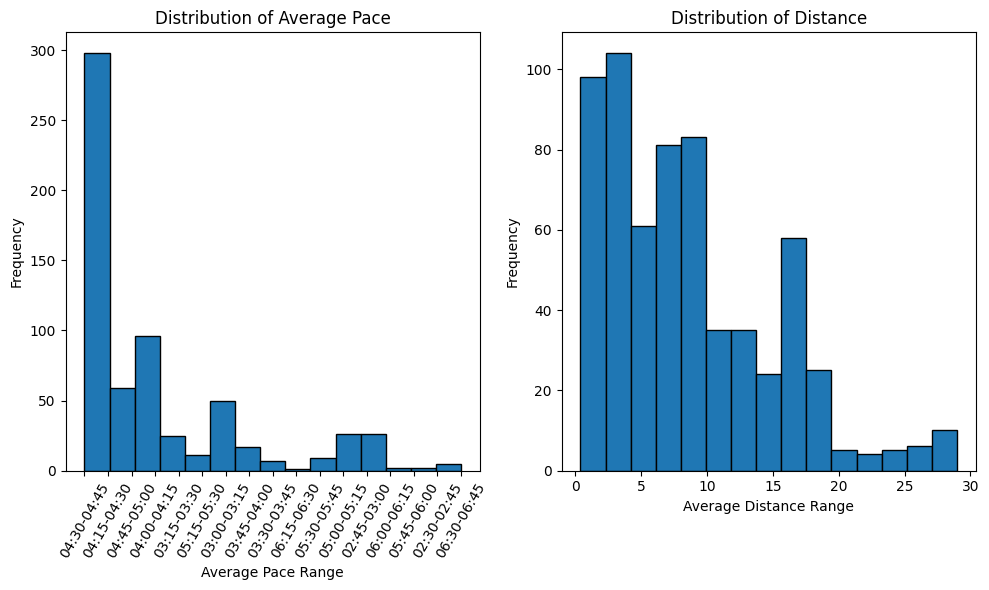

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
# Plotting histogram of average pace
plt.subplot(1, 2, 1)
plt.hist(df['Pace Range'], edgecolor='black', bins=15)
plt.xlabel('Average Pace Range')
plt.xticks(rotation = 60)
plt.ylabel('Frequency')
plt.title('Distribution of Average Pace')

plt.subplot(1, 2, 2)
plt.hist(df['Distance'], edgecolor='black', bins=15)
plt.xlabel('Average Distance Range')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')
plt.tight_layout()
plt.show()

C:\Users\Adrian_PC\AppData\Local\Temp\ipykernel_9160\3457367977.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hr_stats = df.groupby('Title')['Avg HR', 'Max HR'].mean().reset_index()


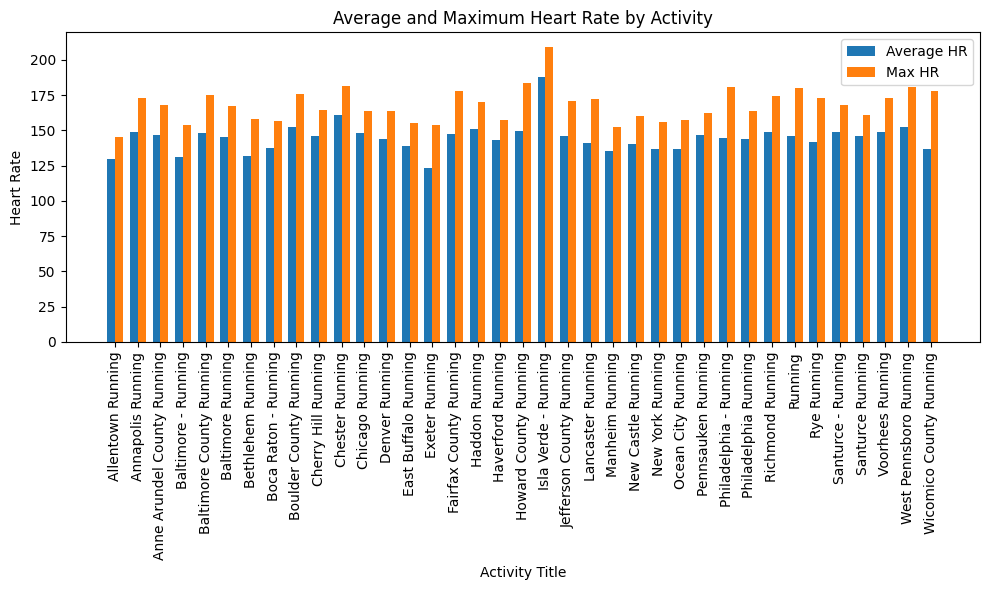

In [113]:
# Group the data by 'Title' and calculate the average and maximum heart rate
hr_stats = df.groupby('Title')['Avg HR', 'Max HR'].mean().reset_index()

# Plotting average and maximum heart rate
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(hr_stats))
plt.bar(index, hr_stats['Avg HR'], bar_width, label='Average HR')
plt.bar(index + bar_width, hr_stats['Max HR'], bar_width, label='Max HR')
plt.xlabel('Activity Title')
plt.ylabel('Heart Rate')
plt.title('Average and Maximum Heart Rate by Activity')
plt.xticks(index + bar_width / 2, hr_stats['Title'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


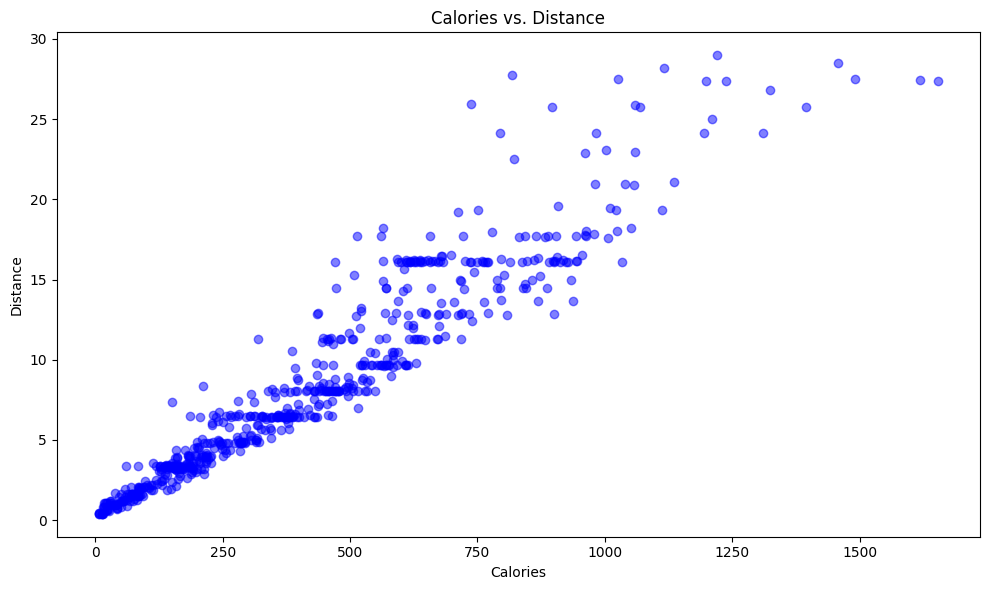

In [108]:
# Plotting distance vs. elevation gain
plt.figure(figsize=(10, 6))
plt.scatter(df['Calories'], df['Distance'], c='blue', alpha=0.5)
plt.xlabel('Calories')
plt.ylabel('Distance')
plt.title('Calories vs. Distance')
plt.tight_layout()
plt.show()

## Drop columns which won't be usefull for out regression

In [14]:
df_for_model = df.drop(['Activity Type', 'Date', 'Title', 'Best Lap Time', 'Number of Laps'], axis=1)

In [15]:
df_for_model.head()

,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length
0,9.66,530,2635,141,160,176,182,273,236,169.0,173.0,1.26
1,10.46,587,2824,144,160,172,182,270,245,183.0,187.0,1.29
2,8.06,392,2429,128,151,170,180,301,217,124.0,124.0,1.17
3,11.28,633,3175,142,157,172,180,281,186,215.0,219.0,1.24
4,8.35,419,2495,129,143,170,178,299,254,76.0,80.0,1.18


## Looking for Correlations

In [17]:
corr_matrix = df_for_model.corr(numeric_only=True)

In [18]:
corr_matrix['Time'].sort_values(ascending=False)

Time                 1.000000
Distance             0.992891
Calories             0.955622
Elev Gain            0.821551
Elev Loss            0.818582
Avg Pace             0.252870
Max HR               0.134543
Best Pace            0.038627
Avg HR              -0.053432
Max Run Cadence     -0.178102
Avg Stride Length   -0.319321
Avg Run Cadence     -0.331184
Name: Time, dtype: float64

# Split dataset

In [19]:
from sklearn.model_selection import train_test_split

def get_data_splits(X, y, train_size=0.7):
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [20]:
X_train, X_val, X_test, y_train, y_val, y_test = get_data_splits(X=df_for_model.drop('Time', axis=1), y=df_for_model['Time'])

# Train, adjust hyperparameters and evaluate models

## -->Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_reg = LinearRegression()
# Train model on the training set
lin_reg.fit(X_train, y_train)
# Predict values 
y_pred = lin_reg.predict(X_test)
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f} seconds')
print(f'Mean absolute error: {mae:.2f} seconds')

Mean squared error: 122.89 seconds
Mean absolute error: 87.00 seconds


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)
print('Outcomes:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Outcomes: [111.20145296 135.70885721 118.2078381  156.53620573 140.75600877
 117.07926399 105.71249414 182.51891531 104.53656825 106.55886063]
Mean: 127.88164651124853
Standard deviation: 24.521332395853122


### <u> Linear Regression with PolynomialFeature </u> 

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler(),
    LinearRegression()
)
# Train model on training set
polynomial_regression.fit(X_train, y_train)
# Predict valeus 
y_pred = polynomial_regression.predict(X_test)
# Evalueate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f} seconds')
print(f'Mean absolute error: {mae:.2f} seconds')

scores = cross_val_score(polynomial_regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)
print('\nOutcomes:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Mean squared error: 4.93 seconds
Mean absolute error: 3.57 seconds

Outcomes: [2.88089439 6.83689583 4.72247491 5.95187229 5.52646085 4.29940493
 3.07677063 4.72077316 5.33666904 4.84044824]
Mean: 4.819266426845185
Standard deviation: 1.1491216532649102


In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

param_grid = {
    'poly__degree': [1,2,3,4]
}
# Create a GridSearchCV object with pipeline and hyperparamters to search over
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Train the grid search on training set
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters: ", grid_search.best_params_)
print("Best MSE: ", np.sqrt(-grid_search.best_score_))

Best hyperparameters:  {'poly__degree': 2}
Best MSE:  5.405348314305393


## --> SVM

In [29]:
from sklearn.svm import SVR

svm_reg_pipe = make_pipeline(
    StandardScaler(),
    SVR()
)
svm_reg = SVR()
# Train model on training set
svm_reg_pipe.fit(X_train, y_train)
y_pred = svm_reg_pipe.predict(X_test)
# Evalueate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f} seconds')
print(f'Mean absolute error: {mae:.2f} seconds')

scores = cross_val_score(svm_reg_pipe, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)
print('\nOutcomes:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Mean squared error: 1752.09 seconds
Mean absolute error: 1352.38 seconds

Outcomes: [1463.38583766 1668.56549134 1458.48011337 1899.08778814 1634.39489456
 1498.1952712  1882.60971203 1885.11979069 1612.33029929 1825.51476271]
Mean: 1682.7683960991685
Standard deviation: 169.72261657888671


## --> RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)
# Train model on training set
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
# Evalueate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f} seconds')
print(f'Mean absolute error: {mae:.2f} seconds')

scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)
print('\nOutcomes:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Mean squared error: 99.85 seconds
Mean absolute error: 63.72 seconds

Outcomes: [ 97.44426657  79.68426797  89.23167184 163.50320648 137.90629646
 115.21141868 113.43881191 184.63416597 106.26859622 133.76336014]
Mean: 122.10860622454797
Standard deviation: 31.4182244010454


In [31]:
pd.DataFrame({'y_test': y_test.values, 'y_pred': y_pred}).head()

,y_test,y_pred
0,178,179.82
1,2323,2373.75
2,2387,2356.00
3,3333,3316.33
4,888,880.15


## --> Stochastic Gradient Descent

In [32]:
from sklearn.linear_model import SGDRegressor

# Train model on training set
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
y_pred = sgd_reg.predict(X_test)
# Evalueate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean squared error: {mse:.2f} seconds')
print(f'Mean absolute error: {mae:.2f} seconds')

Mean squared error: 961509565712338.75 seconds
Mean absolute error: 868291046838595.00 seconds


In [33]:
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': 10.0 ** -np.arange(1, 4),
    'power_t': np.arange(0, 2, 0.25),
    'max_iter': np.arange(1000, 10000, 1000),
}
model = SGDRegressor()
rnd_search = RandomizedSearchCV(model, param_grid)
rnd_search.fit(X_train, y_train)
print('Best hyperparamenters: ', rnd_search.best_params_)
print("Best MSE: ", rnd_search.best_score_)

Best hyperparamenters:  {'power_t': 1.0, 'penalty': 'l2', 'max_iter': 8000, 'loss': 'huber', 'learning_rate': 'invscaling', 'eta0': 0.1, 'alpha': 1e-06}
Best MSE:  0.9342297316738563


In [34]:
model = SGDRegressor(
    loss='huber', penalty='l2', alpha=1e-05, max_iter=9000,
    learning_rate='invscaling', eta0=0.01, power_t=0.25,
    warm_start=True)

Epoch: 00 | train_mse: 186151.59569, val_mse: 205374.85506
Epoch: 10 | train_mse: 152941.71677, val_mse: 164817.52966
Epoch: 20 | train_mse: 135153.18209, val_mse: 145573.77278
Epoch: 30 | train_mse: 123531.20139, val_mse: 119853.39001
Epoch: 40 | train_mse: 112365.47055, val_mse: 117583.99968
Epoch: 50 | train_mse: 116273.64868, val_mse: 128728.29977
Epoch: 60 | train_mse: 111396.78748, val_mse: 100643.32838
Epoch: 70 | train_mse: 114962.56234, val_mse: 131566.80319
Epoch: 80 | train_mse: 114299.87044, val_mse: 131666.43148
Epoch: 90 | train_mse: 80383.44514, val_mse: 85274.35305
Epoch: 100 | train_mse: 73619.04271, val_mse: 80682.01467
Epoch: 110 | train_mse: 74104.69330, val_mse: 85563.35402
Epoch: 120 | train_mse: 72359.63579, val_mse: 85937.15265
Epoch: 130 | train_mse: 60404.98889, val_mse: 67558.37639
Epoch: 140 | train_mse: 55048.45518, val_mse: 58479.19834
Epoch: 150 | train_mse: 65961.10882, val_mse: 57992.15525
Epoch: 160 | train_mse: 50555.64802, val_mse: 50066.28640
Epoch:

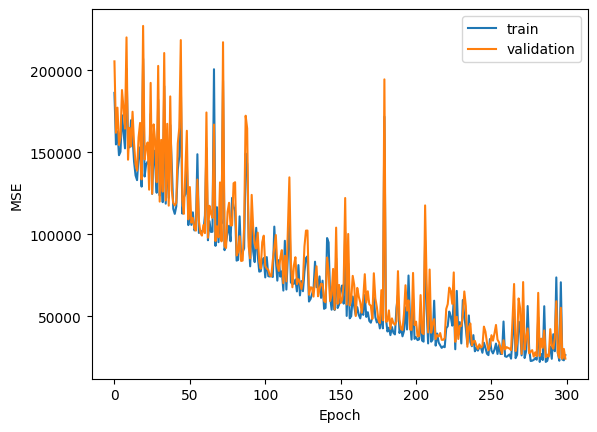

In [35]:
import matplotlib.pyplot as plt

num_epochs = 300
train_mse = []
val_mse = []

for epoch in range(num_epochs):
    # Training
    model.fit(X_train, y_train)

    # Evaluation
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)    
    train_mse.append(mean_squared_error(y_train, train_pred))
    val_mse.append(mean_squared_error(y_val, val_pred))
    
    if not epoch%10:
        print(
            f"Epoch: {epoch:02d} | "
            f"train_mse: {train_mse[-1]:.5f}, "
            f"val_mse: {val_mse[-1]:.5f}"
        )

# Plot the MSE for each epoch
plt.plot(train_mse, label='train')
plt.plot(val_mse, label='validation')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Testing models with different combination of features

In [36]:
df.corr(numeric_only=True)['Calories'].sort_values(ascending=False)

Calories             1.000000
Time                 0.955622
Distance             0.950508
Number of Laps       0.944696
Elev Gain            0.767314
Elev Loss            0.763612
Avg Pace             0.242882
Max HR               0.236209
Avg HR               0.104829
Best Pace            0.054429
Max Run Cadence     -0.216974
Avg Stride Length   -0.299361
Avg Run Cadence     -0.366149
Name: Calories, dtype: float64

In [37]:
new_df = df_for_model.drop(['Max HR', 'Best Pace', 'Max Run Cadence', 'Avg Stride Length'], axis=1)

In [38]:
X_train, X_val, X_test, y_train, y_val, y_test = get_data_splits(X=new_df.drop('Calories', axis=1), y=new_df['Calories'])

### Linear Regression

In [39]:
lin_reg = LinearRegression()
# Train model on the training set
lin_reg.fit(X_train, y_train)
# Predict values 
y_pred = lin_reg.predict(X_test)
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Root mean squared error: {mse:.2f} calories')
print(f'Mean absolute error: {mae:.2f} calories')

scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)
print('\nOutcomes:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Root mean squared error: 64.12 calories
Mean absolute error: 44.54 calories

Outcomes: [57.92225573 93.5023716  58.70922722 86.02391241 92.60274924 68.03373995
 64.38318104 82.15636907 87.38622441 68.67914931]
Mean: 75.93991799660951
Standard deviation: 13.144414404180528


### Linear Regression with Polynomial Features

In [40]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(include_bias=False),
    LinearRegression()
)
# Train model on training set
polynomial_regression.fit(X_train, y_train)
# Predict valeus 
y_pred = polynomial_regression.predict(X_test)
# Evalueate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Root mean squared error: {mse:.2f} calories')
print(f'Mean absolute error: {mae:.2f} calories')

scores = cross_val_score(polynomial_regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)
print('\nOutcomes:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Root mean squared error: 45.39 calories
Mean absolute error: 29.73 calories

Outcomes: [37.22197739 50.341404   31.87968289 44.14693275 46.37864098 40.59431665
 42.49243655 48.20695616 56.68468381 50.21788391]
Mean: 44.81649150825335
Standard deviation: 6.805903399204066


### -->SVM Regressor

In [42]:
from sklearn.svm import SVR

svm_reg_pipe = make_pipeline(
    StandardScaler(),
    SVR()
)
# Train model on training set
svm_reg_pipe.fit(X_train, y_train)
y_pred = svm_reg_pipe.predict(X_test)
# Evalueate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Root mean squared error: {mse:.2f} calories')
print(f'Mean absolute error: {mae:.2f} calories')

scores = cross_val_score(svm_reg_pipe, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)
print('\nOutcomes:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Root mean squared error: 282.78 calories
Mean absolute error: 214.50 calories

Outcomes: [223.10835328 330.17757264 246.94185521 301.31299113 253.37620159
 257.45625399 295.986131   324.50230541 270.12568411 277.02739194]
Mean: 278.00147402889166
Standard deviation: 32.89527160547896


### -->RandomForest Regressor

In [43]:
forest_reg = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=500, min_samples_leaf=1, random_state=42)
)
# Train model on training set
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
# Evalueate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Root mean squared error: {mse:.2f} calories')
print(f'Mean absolute error: {mae:.2f} calories')

# scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
# scores = np.sqrt(-scores)
# print('\nOutcomes:', scores)
# print('Mean:', scores.mean())
# print('Standard deviation:', scores.std())

Root mean squared error: 57.49 calories
Mean absolute error: 36.37 calories


In [44]:
pd.DataFrame({'y_test': y_test.values, 'y_pred': y_pred}).head()

,y_test,y_pred
0,29,23.100
1,506,472.036
2,440,421.490
3,808,712.636
4,163,165.122


## Warning!!!

**This may take a few minutes!!!**

In [45]:
# Define the hyperparameter parameters
params = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'log2', 'sqrt'],
    'bootstrap': [True, False]
}

# Create the Random Forest Regressor object
rf_reg = RandomForestRegressor(random_state=42)
# Create the RandomizedSearchCV object
rs_reg = GridSearchCV(rf_reg, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Train the RandomizedSearchCV object on the training set
rs_reg.fit(X_train, y_train)

# Print the best hyperparameters found
print('Best Hyperparameters:', rs_reg.best_params_)
print('Best Score:', rs_reg.best_score_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best Score: -3061.2560565306753


In [46]:
forest_reg_best_params = RandomForestRegressor(**rs_reg.best_params_)
# Train model on training set
forest_reg_best_params.fit(X_train, y_train)
y_pred = forest_reg_best_params.predict(X_test)
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Root mean squared error: {mse:.2f} calories')
print(f'Mean absolute error: {mae:.2f} calories')

scores = cross_val_score(forest_reg_best_params, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-scores)
print('\nOutcomes:', scores)
print('Mean:', scores.mean())
print('Standard deviation:', scores.std())

Root mean squared error: 59.74 calories
Mean absolute error: 37.77 calories

Outcomes: [28.77813547 87.61723989 46.54994839 67.43715268 50.62853139 53.53637372
 41.98933246 49.32301361 47.35810627 52.70868291]
Mean: 52.592651681506894
Standard deviation: 14.852641700818486


In [47]:
new_df.head()

,Distance,Calories,Time,Avg HR,Avg Run Cadence,Avg Pace,Elev Gain,Elev Loss
0,9.66,530,2635,141,176,273,169.0,173.0
1,10.46,587,2824,144,172,270,183.0,187.0
2,8.06,392,2429,128,170,301,124.0,124.0
3,11.28,633,3175,142,172,281,215.0,219.0
4,8.35,419,2495,129,170,299,76.0,80.0


## Testing models on new data

In [51]:
import pandas as pd

new_test_data = pd.DataFrame({
        'Distance': [7.85, 6.75, 9.12, 8.93, 5.27, 6.20],
        'Time': [2387, 2124, 2745, 2678, 1885, 2164],
        'Avg HR': [148, 138, 152, 146, 134, 166],
        'Avg Run Cadence': [174, 169, 181, 179, 163, 156],
        'Avg Pace': [305, 315, 301, 299, 358, 349],
        'Elev Gain': [132.0, 156.0, 189.0, 174.0, 92.0, 236.0],
        'Elev Loss': [129.0, 143.0, 167.0, 152.0, 81.0, 221.0]
    })
new_test_data

,Distance,Time,Avg HR,Avg Run Cadence,Avg Pace,Elev Gain,Elev Loss
0,7.85,2387,148,174,305,132.0,129.0
1,6.75,2124,138,169,315,156.0,143.0
2,9.12,2745,152,181,301,189.0,167.0
3,8.93,2678,146,179,299,174.0,152.0
4,5.27,1885,134,163,358,92.0,81.0
5,6.20,2164,166,156,349,236.0,221.0


In [52]:
predict_calories_pol = polynomial_regression.predict(new_test_data)
predict_calories_forest = forest_reg.predict(new_test_data)
predict_calories_forest_rs = forest_reg_best_params.predict(new_test_data)
print(f'''
Polynomial regressor: {predict_calories_pol} 
RandomForest regressor: {predict_calories_forest}
RandomForest regressor with best params: {predict_calories_forest_rs}
''')


Polynomial regressor: [480.31123731 399.4076742  505.52903543 473.87670635 350.79492447
 572.55717478] 
RandomForest regressor: [454.726 385.068 554.302 535.362 330.368 434.54 ]
RandomForest regressor with best params: [451.32584959 387.6215676  552.20992277 531.85883046 333.33153333
 442.68254921]

